Algorytm Kolorowania Zachłannego

Algorytm kolorowania zachłannego przydziela kolory do wierzchołków grafu w taki sposób, aby żadne dwa sąsiadujące wierzchołki nie miały tego samego koloru. Oto pseudokod tego algorytmu oraz jego implementacja w Pythonie, wraz z przykładami i rysunkami.

1. Ustaw wierzchołki grafu w ciąg $( v_1, v_2, \ldots, v_n )$,
2. Dla każdego wierzchołka $( i )$ od $1$ do $( n)$ wykonuj,
    - $ c_i := \min\{k : k \notin \{c_j : j < i \text{ i } v_j \in N(v_i)\}\}$

Interpetacja pseudokodu


 1. To oznacza, że wierzchołki grafu są uporządkowane w jakiejś kolejności. Może to być dowolna kolejność, na przykład kolejność numeracji wierzchołków.
Dla każdego wierzchołka 
𝑖
i od 1 do 
𝑛
n wykonuj:

2.Ten krok oznacza, że iterujemy przez wszystkie wierzchołki grafu w ustalonej kolejności.
​

Dla każdego wierzchołka 
 wybieramy najmniejszy kolor 
k, który nie jest używany przez sąsiadów 
 , które zostały już pokolorowane (czyli te, które pojawiły się wcześniej w kolejności).
​
$N(v_i)$ oznacza zbiór sąsiadów wierzchołka 
 $\{ c_j : j < i \text{ i } v_j \in N(v_i) \}$ oznacza zbiór kolorów sąsiadów, które zostały już pokolorowane.

Cały kod oraz ze przykładami

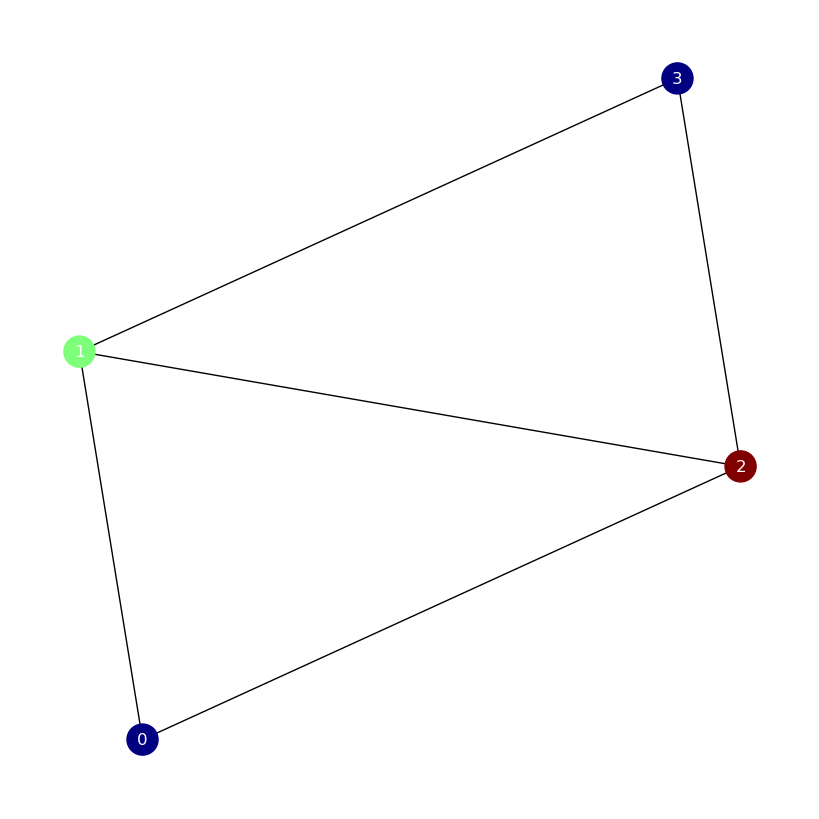

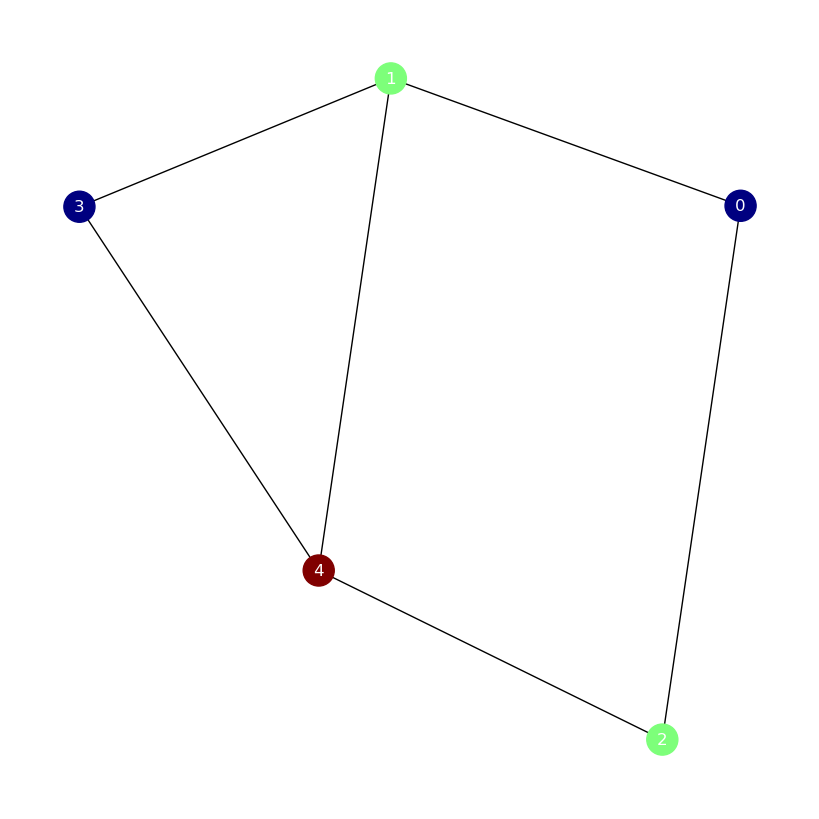

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def greedy_coloring(graph):
    # Inicjalizacja kolorów wszystkich wierzchołków jako niezafarbowanych (-1)
    colors = {node: -1 for node in graph.nodes}
    
    # Przydziel pierwszy kolor pierwszemu wierzchołkowi
    colors[list(graph.nodes)[0]] = 0
    
    # Stworzenie słownika dostępnych kolorów
    available_colors = [True] * len(graph.nodes)
    
    # Iteracja przez wierzchołki grafu zaczynając od drugiego wierzchołka
    for node in list(graph.nodes)[1:]:
        # Sprawdzanie kolorów sąsiadów i oznaczenie ich jako niedostępne
        for neighbor in graph.neighbors(node):
            if colors[neighbor] != -1:
                available_colors[colors[neighbor]] = False
        
        # Znajdowanie pierwszego dostępnego koloru
        color = next(color for color, available in enumerate(available_colors) if available)
        
        # Przypisywanie koloru do wierzchołka
        colors[node] = color
        
        # Resetowanie dostępnych kolorów na true
        available_colors = [True] * len(graph.nodes)
    
    return colors

def draw_colored_graph(graph, colors):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color=[colors[node] for node in graph.nodes], cmap=plt.cm.jet, node_size=500, font_color='white')
    plt.show()

# Przykład 1
graph1 = nx.Graph()
edges1 = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]
graph1.add_edges_from(edges1)

colors1 = greedy_coloring(graph1)
draw_colored_graph(graph1, colors1)

# Przykład 2
graph2 = nx.Graph()
edges2 = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
graph2.add_edges_from(edges2)

colors2 = greedy_coloring(graph2)
draw_colored_graph(graph2, colors2)


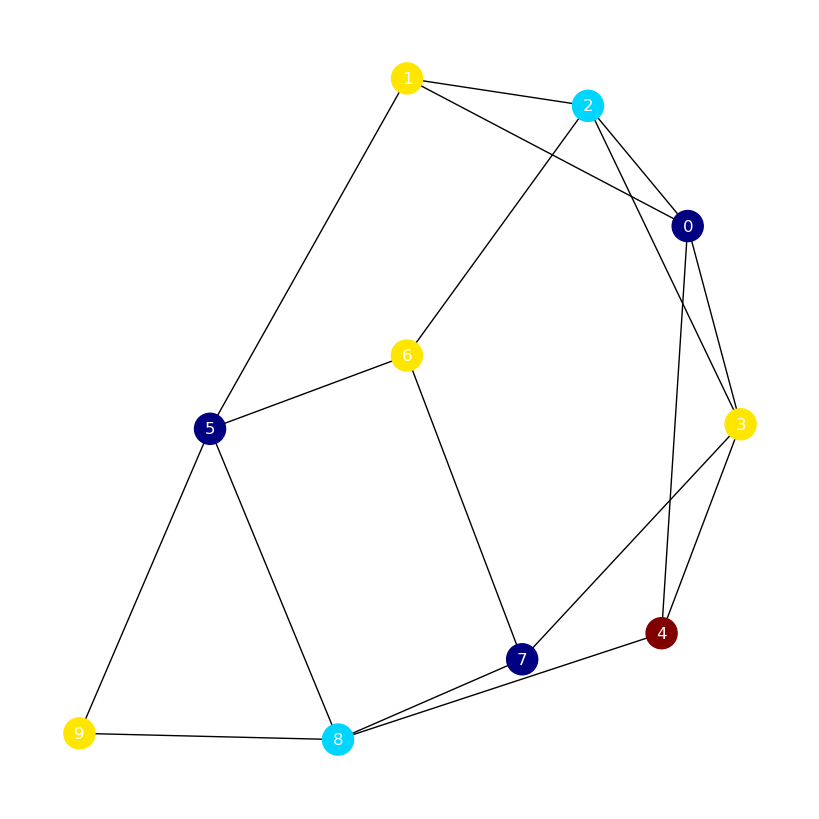

In [4]:
# Advanced Example
graph3 = nx.Graph()
edges3 = [
    (0, 1), (0, 2), (0, 3), (0, 4),
    (1, 2), (1, 5),
    (2, 3), (2, 6),
    (3, 4), (3, 7),
    (4, 8), (5, 6), (5, 8),
    (6, 7), (7, 8), (8, 9), (9, 5)
]
graph3.add_edges_from(edges3)

colors3 = greedy_coloring(graph3)
draw_colored_graph(graph3, colors3)
